## Cargando el conjunto de datos

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [2]:
#iris = datasets.load_iris()
iris = sns.load_dataset("iris")
iris.head()
datos = iris

## Obteniendo la variable respuesta

In [3]:
y = datos.pop("species")

print(y)
print(datos.head())

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
22        setosa
23        setosa
24        setosa
25        setosa
26        setosa
27        setosa
28        setosa
29        setosa
         ...    
120    virginica
121    virginica
122    virginica
123    virginica
124    virginica
125    virginica
126    virginica
127    virginica
128    virginica
129    virginica
130    virginica
131    virginica
132    virginica
133    virginica
134    virginica
135    virginica
136    virginica
137    virginica
138    virginica
139    virginica
140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virgini

Text(0.5, 1.0, 'Correlación de las variables numéricas de Iris')

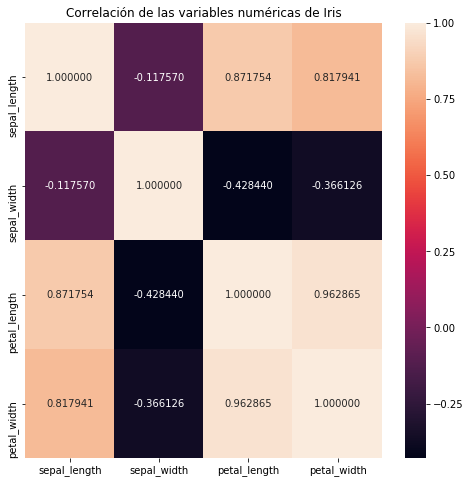

In [4]:
plt.subplots(figsize = (8,8))
sns.heatmap(datos.corr(),annot=True,fmt="f").set_title("Correlación de las variables numéricas de Iris")

### Separando en train y test

#### Virginica

In [5]:
X = datos #El resto de los datos
random.seed(123)

In [6]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

70% de entrenamiento y 30% prueba

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 136 to 72
Data columns (total 4 columns):
sepal_length    105 non-null float64
sepal_width     105 non-null float64
petal_length    105 non-null float64
petal_width     105 non-null float64
dtypes: float64(4)
memory usage: 4.1 KB


In [8]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 37 to 41
Data columns (total 4 columns):
sepal_length    45 non-null float64
sepal_width     45 non-null float64
petal_length    45 non-null float64
petal_width     45 non-null float64
dtypes: float64(4)
memory usage: 1.8 KB


### Normalizando los datos

In [9]:
scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train[:3])

[[ 0.55333328  0.78880759  1.0469454   1.58046376]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-0.90068117  1.70959465 -1.2833891  -1.18381211]]


### Creando el modelo

In [10]:
mlp = MLPClassifier(hidden_layer_sizes=(10,8), max_iter=1000)
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
y_pred

array(['setosa', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor'], dtype='<U10')

In [12]:
cm = confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión\n',cm)
print('Accuracy: ',accuracy)

Matriz de confusión
 [[16  1  0]
 [ 0 13  1]
 [ 0  1 13]]
Accuracy:  0.9333333333333333
